In [1]:
import torch
import data_utils
from models.DeepAnT import DeepAnT_CNN, DeepAnT_LSTM
from training.DeepAnT_train import train_kdd99, train_financial
import matplotlib.pyplot as plt

In [2]:
# Try to use GPU if available
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)

cuda


# Hyperparameters

In [3]:
# choose between CNN and LSTM based DeepAnT
model_type = "CNN"
# choose dataset (e.g., kdd99, aapl, gm, axp, etc.)
dataset = "aapl"

In [4]:
if model_type == "LSTM":
    # Data
    num_features = 7
    seq_length = 30
    seq_stride = 10
    gen_seq_len = seq_length
    batch_size = 8
    # Model
    hidden_dim = 128
    layers = 4
    anm_det_thr = 0.5
    # Training
    num_epochs = 100
    lr=1e-5
    wd=5e-6

In [5]:
if model_type == "CNN":
    # Data
    num_features = 7
    seq_length = 30
    seq_stride = 1
    gen_seq_len = 1
    batch_size = 256
    # Model
    dense_dim = 64 
    num_channels = 64
    kernel_size = 1
    anm_det_thr = 0.8
    # Training
    num_epochs = 100
    lr=1e-5
    wd=5e-6

# Dataset

In [2]:
if dataset == "kdd99":
    train_dl, test_dl = data_utils.kdd99(seq_length, seq_stride, num_features, gen_seq_len, batch_size, deepant=True)
else:
    file_path = 'data/financial_data/Stocks/' + dataset + '.us.txt'
    tscv_dl_list = data_utils.load_stock_as_crossvalidated_timeseries(file_path, seq_length, seq_stride, gen_seq_len, batch_size, normalise=True)

NameError: name 'dataset' is not defined

# Model 

In [7]:
if model_type == "LSTM":
    model = DeepAnT_LSTM(num_features,hidden_dim,layers,anm_det_thr).to(DEVICE)
elif model_type == "CNN":
    model = DeepAnT_CNN(seq_length,num_features, kernel_size, dense_dim, num_channels, anm_det_thr).to(DEVICE)

# Loss & Optimizer

In [8]:
loss_function = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(list(model.parameters()), lr=lr, weight_decay=wd)

# Training & Evaluation

In [9]:
if dataset == "kdd99":
    train_kdd99(train_dl, test_dl, model, optimizer, loss_function, num_epochs, DEVICE)
else:
    train_financial(tscv_dl_list, model, optimizer, loss_function, num_epochs, DEVICE)

Epoch 0 loss: 1.210319608449936
Epoch 1 loss: 1.2104912400245667
Epoch 2 loss: 1.212997555732727
Epoch 3 loss: 1.2109295725822449
Epoch 4 loss: 1.2113749980926514
Epoch 5 loss: 1.214013010263443
Epoch 6 loss: 1.2110584080219269
Epoch 7 loss: 1.2122873365879059
Epoch 8 loss: 1.2133127450942993
Epoch 9 loss: 1.2105592489242554
Epoch 10 loss: 1.2083431780338287
Epoch 11 loss: 1.2072779536247253
Epoch 12 loss: 1.2092916667461395
Epoch 13 loss: 1.2065090537071228
Epoch 14 loss: 1.2073628604412079
Epoch 15 loss: 1.2078645825386047
Epoch 16 loss: 1.2065640687942505
Epoch 17 loss: 1.2102572917938232
Epoch 18 loss: 1.207174301147461
Epoch 19 loss: 1.2113791108131409
Epoch 20 loss: 1.2040742635726929
Epoch 21 loss: 1.2078608870506287
Epoch 22 loss: 1.20321524143219
Epoch 23 loss: 1.2052606642246246
Epoch 24 loss: 1.2083499729633331
Epoch 25 loss: 1.2072049975395203
Epoch 26 loss: 1.203014612197876
Epoch 27 loss: 1.2034226953983307
Epoch 28 loss: 1.2057790756225586
Epoch 29 loss: 1.20391640067100

Epoch 41 loss: 1.0095037668943405
Epoch 42 loss: 1.007957100868225
Epoch 43 loss: 1.0083120316267014
Epoch 44 loss: 1.0093595534563065
Epoch 45 loss: 1.0057689845561981
Epoch 46 loss: 1.0091222673654556
Epoch 47 loss: 1.0079730302095413
Epoch 48 loss: 1.0064912885427475
Epoch 49 loss: 1.007040113210678
Epoch 50 loss: 1.0063747018575668
Epoch 51 loss: 1.0054632276296616
Epoch 52 loss: 1.0052365064620972
Epoch 53 loss: 1.0066025704145432
Epoch 54 loss: 1.0050576329231262
Epoch 55 loss: 1.0054182559251785
Epoch 56 loss: 1.003387451171875
Epoch 57 loss: 1.0050794184207916
Epoch 58 loss: 1.0048985332250595
Epoch 59 loss: 1.0054569244384766
Epoch 60 loss: 1.003232941031456
Epoch 61 loss: 1.0044508576393127
Epoch 62 loss: 1.0047472566366196
Epoch 63 loss: 1.0047476887702942
Epoch 64 loss: 1.0026320964097977
Epoch 65 loss: 1.003796011209488
Epoch 66 loss: 1.0027408748865128
Epoch 67 loss: 1.0019653737545013
Epoch 68 loss: 1.0036380738019943
Epoch 69 loss: 1.0032806098461151
Epoch 70 loss: 1.00

Epoch 81 loss: 0.839786980833326
Epoch 82 loss: 0.8411024979182652
Epoch 83 loss: 0.8388706615992955
Epoch 84 loss: 0.838730948311942
Epoch 85 loss: 0.842033326625824
Epoch 86 loss: 0.8411157046045575
Epoch 87 loss: 0.839186566216605
Epoch 88 loss: 0.8409632444381714
Epoch 89 loss: 0.8390055298805237
Epoch 90 loss: 0.8382845010076251
Epoch 91 loss: 0.8385056342397418
Epoch 92 loss: 0.8384597386632647
Epoch 93 loss: 0.8389621121542794
Epoch 94 loss: 0.841017987046923
Epoch 95 loss: 0.83904801096235
Epoch 96 loss: 0.8373877150671822
Epoch 97 loss: 0.8365541015352521
Epoch 98 loss: 0.838948164667402
Epoch 99 loss: 0.8389877847262791
EM: 0.00013982544964871192, MV: 871506.78125
Final results - EM: 0.00018481645813231849 MV: 767879.8613830078


# Generated Samples

In [1]:
batch = next(iter(tscv_dl_list[4][1]))
x = batch[0][0] if (model_type == "LSTM") else batch[0]
y = batch[1][0] if (model_type == "LSTM") else batch[1][:seq_length].squeeze()
z = model(x.to(DEVICE)).cpu().detach() 
if (model_type == "CNN"): z = z[:seq_length]

NameError: name 'dataset' is not defined

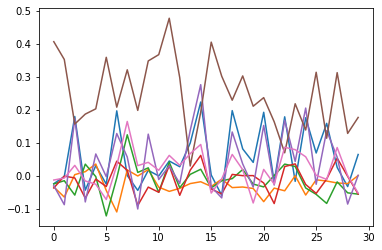

In [27]:
# Generated Sample
plt.plot(z)

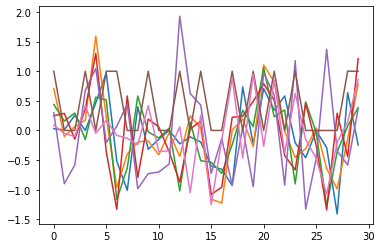

In [22]:
# Real Sample
plt.plot(y)